## ASTU Online Training on AI & ML
## Week 2 Assignment on Unsupervised Learning (Background Subtraction)
## Created By: Alakesh Bora
## Roll No: 170710007005
## Email ID: alokesh985@gmail.com

### Importing the necessary libraries

In [11]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import os
import sys
import cv2

### Calculating Mean and Variance Images

In [12]:
def CalcMeanVariance(Image):
    
    img = mpimg.imread(Image)
    mean_img = img
    variance_img = 9 * np.ones(img.shape) # A square of a number usually gives good results. So, we are taking 9 which is square of 3
    
    return(mean_img, variance_img) 

### Using a Chebyshev Inequality Based Classifier to seperate foreground and background

In [13]:
def Seperate_Foreground(img_file, mean, variance, lmbda):
    
    # Reading the image using opencv
    img = cv2.imread(img_file) 
    
    difference = img - mean
    y = variance * (lmbda ** 2)
    difference_2 = np.square(difference)
    I = difference_2 - y
    
    
    mask = np.all(I > 0, axis = 2)
    result = 255 * mask.astype(int)
    result = result.astype(np.uint8)
    
    
    return(result)

### Attempting to reduce noise using voting

In [14]:
def ReduceNoise(Image, eta, m, n):
    
    # Taking the image's shape
    
    r,c = Image.shape
    result = np.zeros((Image.shape[0], Image.shape[1]))
    
    for i in range(m, r-1-m):
        for j in range(n,c-1-n):
            
            img_patch = result[i - m : i, j - n : j]
            
            y_unq, counts = np.unique(img_patch,return_counts=True)
            
            if len(counts) == 1 and y_unq[0] == 1:
                result[i,j] = 255
            
            if len(counts) > 1:
                if counts[1] > eta * m * n:
                    result[i, j] = 255
    
    result = result.astype(np.uint8)
    return result

### Using a Weighted Average Scheme to update and Mean and Variance Images

In [15]:
def Update(Image, img_path, M, V, alpha):
    
    # Reading the image path
    img = mpimg.imread(img_path)
    
    mean = np.zeros(img.shape)
    var = np.zeros(img.shape)
    
    difference = img - M
    difference_2 = np.square(difference)
    
    for i in range(Image.shape[0]):
        
        for j in range(Image.shape[1]):
            
            if Image[i, j] == 0:
                
                mean[i, j, : ] = (1 - alpha) * M[i, j, : ] + alpha * img[i, j, : ]
                
                var[i, j, : ] = (1 - alpha) * (V[i, j, : ] + alpha * difference_2[i, j, : ])
                
                var[i, j, : ] = np.clip(var[i,j,:], a_min = 9, a_max = None)
    
    return(mean, var)

### Performing Background Subtraction on the input image

In [16]:
def BG_Subtraction(Image, lmda, eta, m, n, alpha):
    
    # Reading the image and calculating the initial mean and vairance images
    
    img = os.listdir(Image)
    Initial_Image = os.path.join(Image, img[0])
    mean, variance = CalcMeanVariance(Initial_Image)
    
    for i in range(1,19):
        
        img_path = os.path.join(Image, img[i])
        
        fig, ax = plt.subplots(1, 3, figsize=(10, 10))
        
        rI = Seperate_Foreground(img_path, mean, variance, lmda)
        
        ax[0].imshow(rI, cmap="gray")
        
        cI = ReduceNoise(rI, eta, m, n)
        
        mean, variance = Update(cI, img_path, mean, variance, alpha)
        
        ax[1].imshow(cI, cmap="gray")
        
        img = cv2.imread(img_path)
        
        ax[2].imshow(img, cmap="gray")
        
        plt.show()
    
        return(mean, variance)

### Varying the eta(Voting Parameter) and lambda(Chebyshev Thresholding Parameter) from
### 0.7 to 0.9 in steps of 0.02

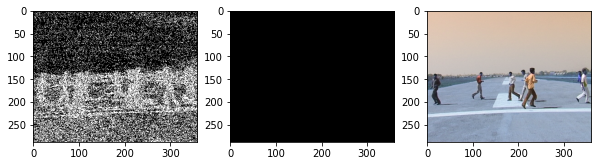

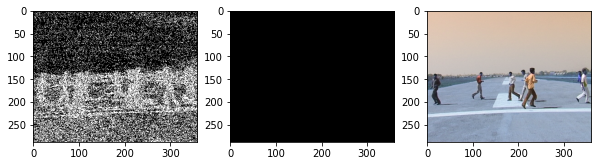

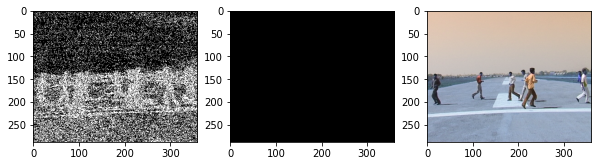

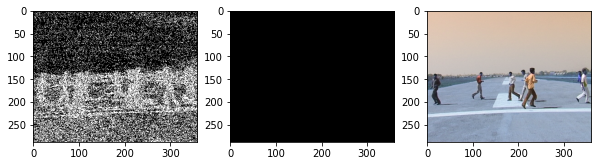

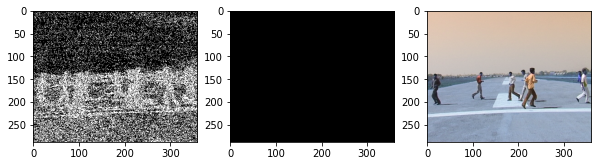

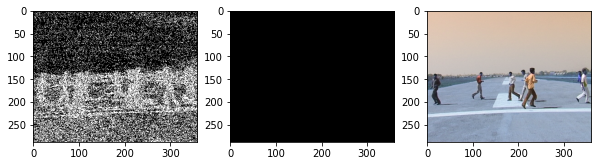

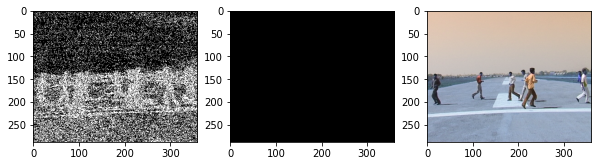

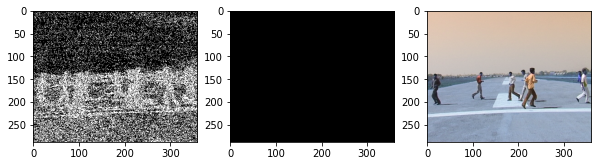

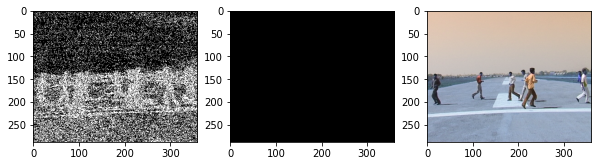

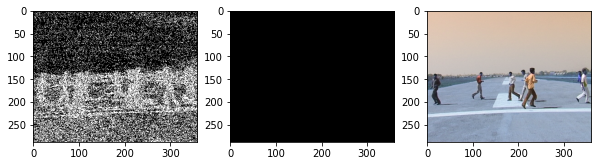

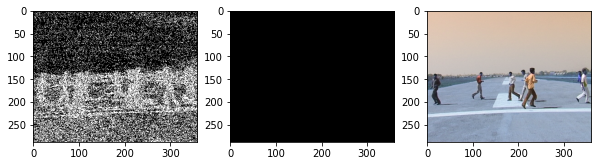

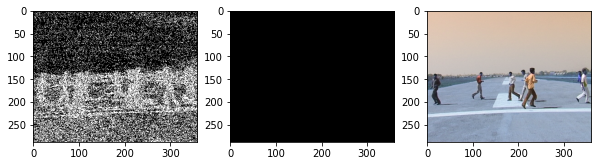

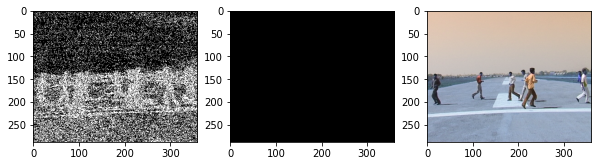

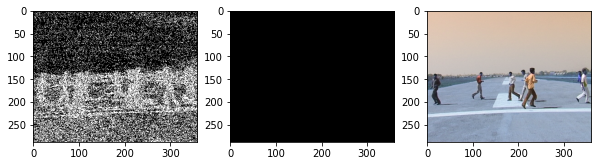

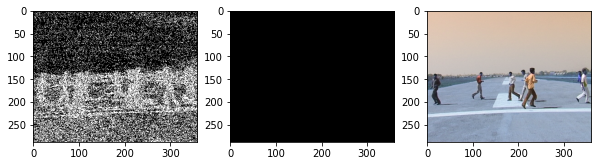

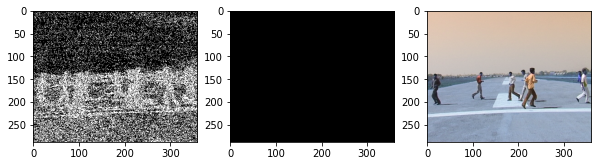

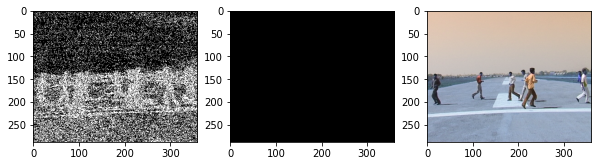

KeyboardInterrupt: 

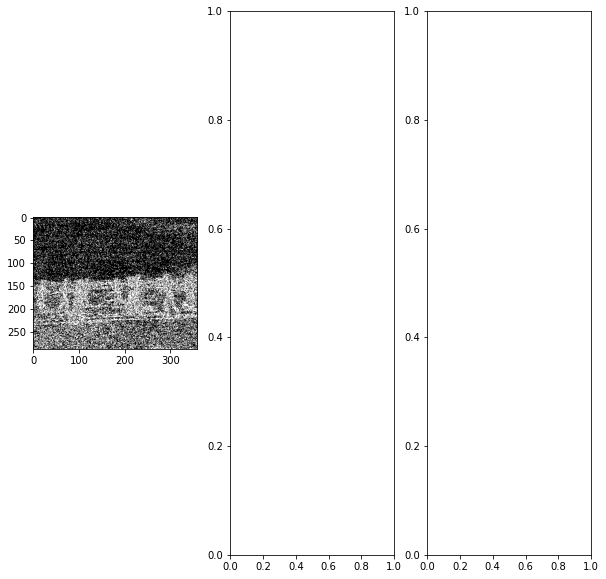

In [21]:
for eta_value in np.arange(0.7, 0.9, 0.02):
    for lambda_value in np.arange(0.7, 0.9, 0.02):
        mean, var = BG_Subtraction("./Images", lambda_value, eta_value, 8,8, 0.8)

### Detecting edges in real time from web-cam (Using Canny Edges Algorithm)

In [22]:
# Starting webcam
capture = cv2.VideoCapture(0)

if(capture == None):
    print("Failed to Open Webcam")
    exit()

while(True):
    # Capture the frames of the video
    _, frame = capture.read()
    
    # Using Canny Edges Algorithm to detect edges
    edges = cv2.Canny(frame,50,100)
    
    cv2.imshow('Original',frame)  ## Showing the original in real time in a window
    cv2.imshow('Edges',edges)     ## Showing the edges in real time in a window
    
    # If 'q' is pressed, window closes
    key = cv2.waitKey(1)
    if  key == ord('q'):
        break

# Close webcam
capture.release()
cv2.destroyAllWindows()